# Telcom Company Customer Churn Data Analysis

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import the Pandas, Numpy, Matplotlib, and Seaborn libraries.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Sourcing, Cleaning and Preparation
<b> Read the Uber data, inspect, clean, and manipulate the data

In [6]:
df = pd.read_csv("Customer_Churn.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)

In [11]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.duplicated().sum()

0

In [16]:
df["customerID"].duplicated().sum()

0

In [17]:
# converted 0 and 1 values of senior citizen to yes and no to make it easier to understand

In [18]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# Count the customer based on the Churn

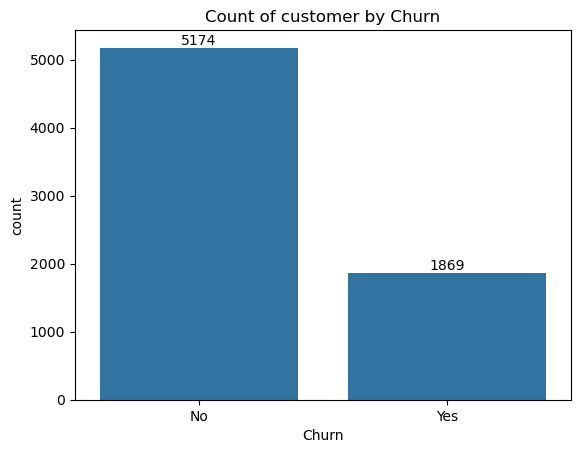

In [21]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")
plt.show()

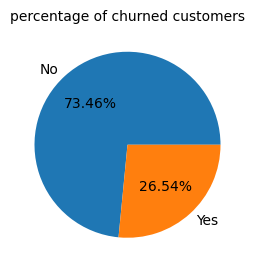

In [22]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({"Churn":'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title("percentage of churned customers",fontsize = 10)
plt.show()

from the given above pie chart we can conclude that 26.54% customers have churned out.
let's explore the reason behind it.

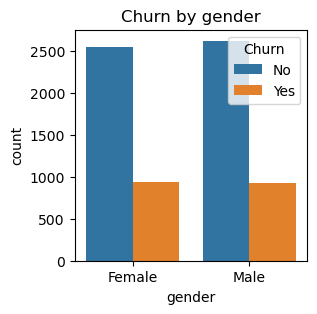

In [24]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title('Churn by gender')
plt.show()

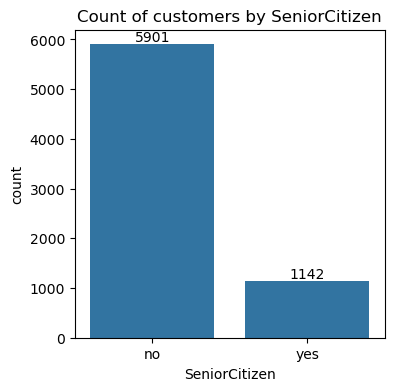

In [25]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of customers by SeniorCitizen')
plt.show()

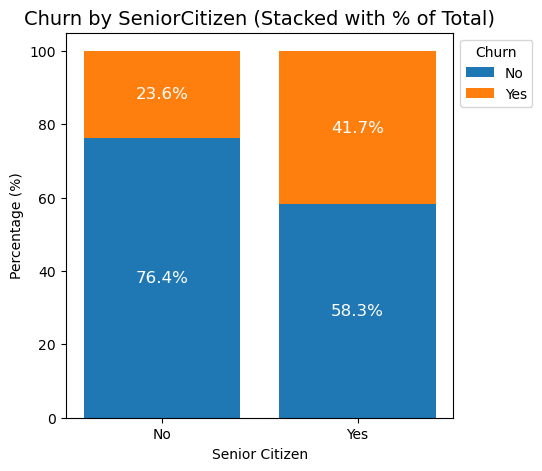

In [26]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
totals = counts.sum(axis=1)
percentages = counts.div(totals, axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))
bottom = np.zeros(len(totals))  # Initialize bottom position for stacking

colors = ['#1f77b4', '#ff7f0e']  # Define colors for "No" and "Yes"
for idx, churn_status in enumerate(counts.columns):
    p = percentages[churn_status]  # Get percentages for each group
    bars = ax.bar(totals.index, p, bottom=bottom, label=churn_status, color=colors[idx])

    # Annotate bars with percentages
    for bar, percentage in zip(bars, p):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2, 
                f"{percentage:.1f}%", ha='center', va='center', fontsize=12, color='white')

    bottom += p  # Update bottom position for stacking

# Labels & Legend
ax.set_title('Churn by SeniorCitizen (Stacked with % of Total)', fontsize=14)
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Percentage (%)')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])  # 0 = Not Senior, 1 = Senior
ax.legend(title='Churn', bbox_to_anchor = (1,1))

plt.show()

comparative a greater percentage of people in senior citizen category have churned

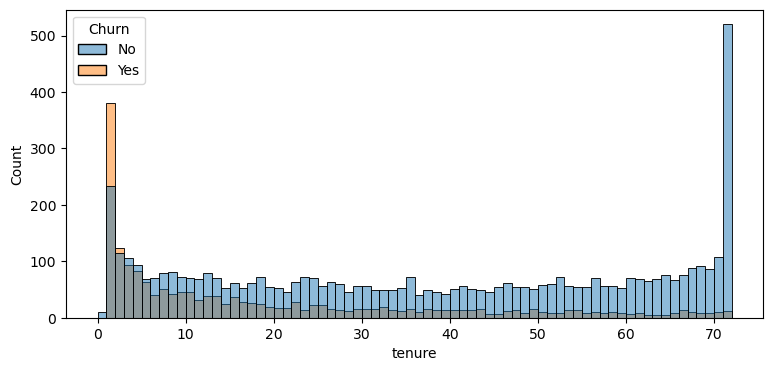

In [28]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, hue = 'Churn', bins = 72)
plt.show()

In [29]:
#people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

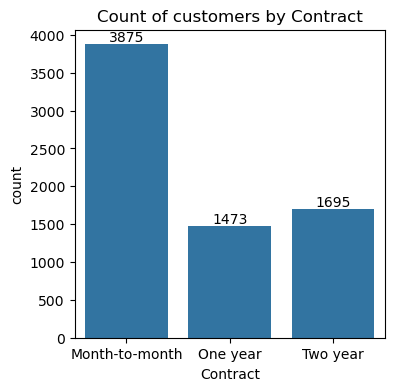

In [30]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of customers by Contract')
plt.show()

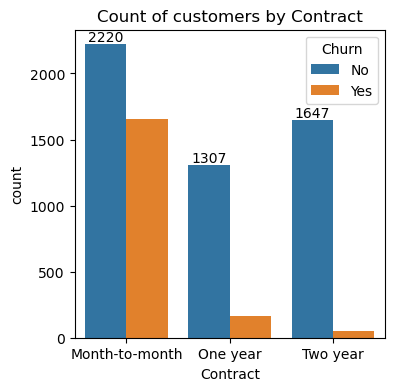

In [31]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of customers by Contract')
plt.show()

people who have month to month contract are likely to churn than from those who have 1 or 2years contract

In [33]:
 df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

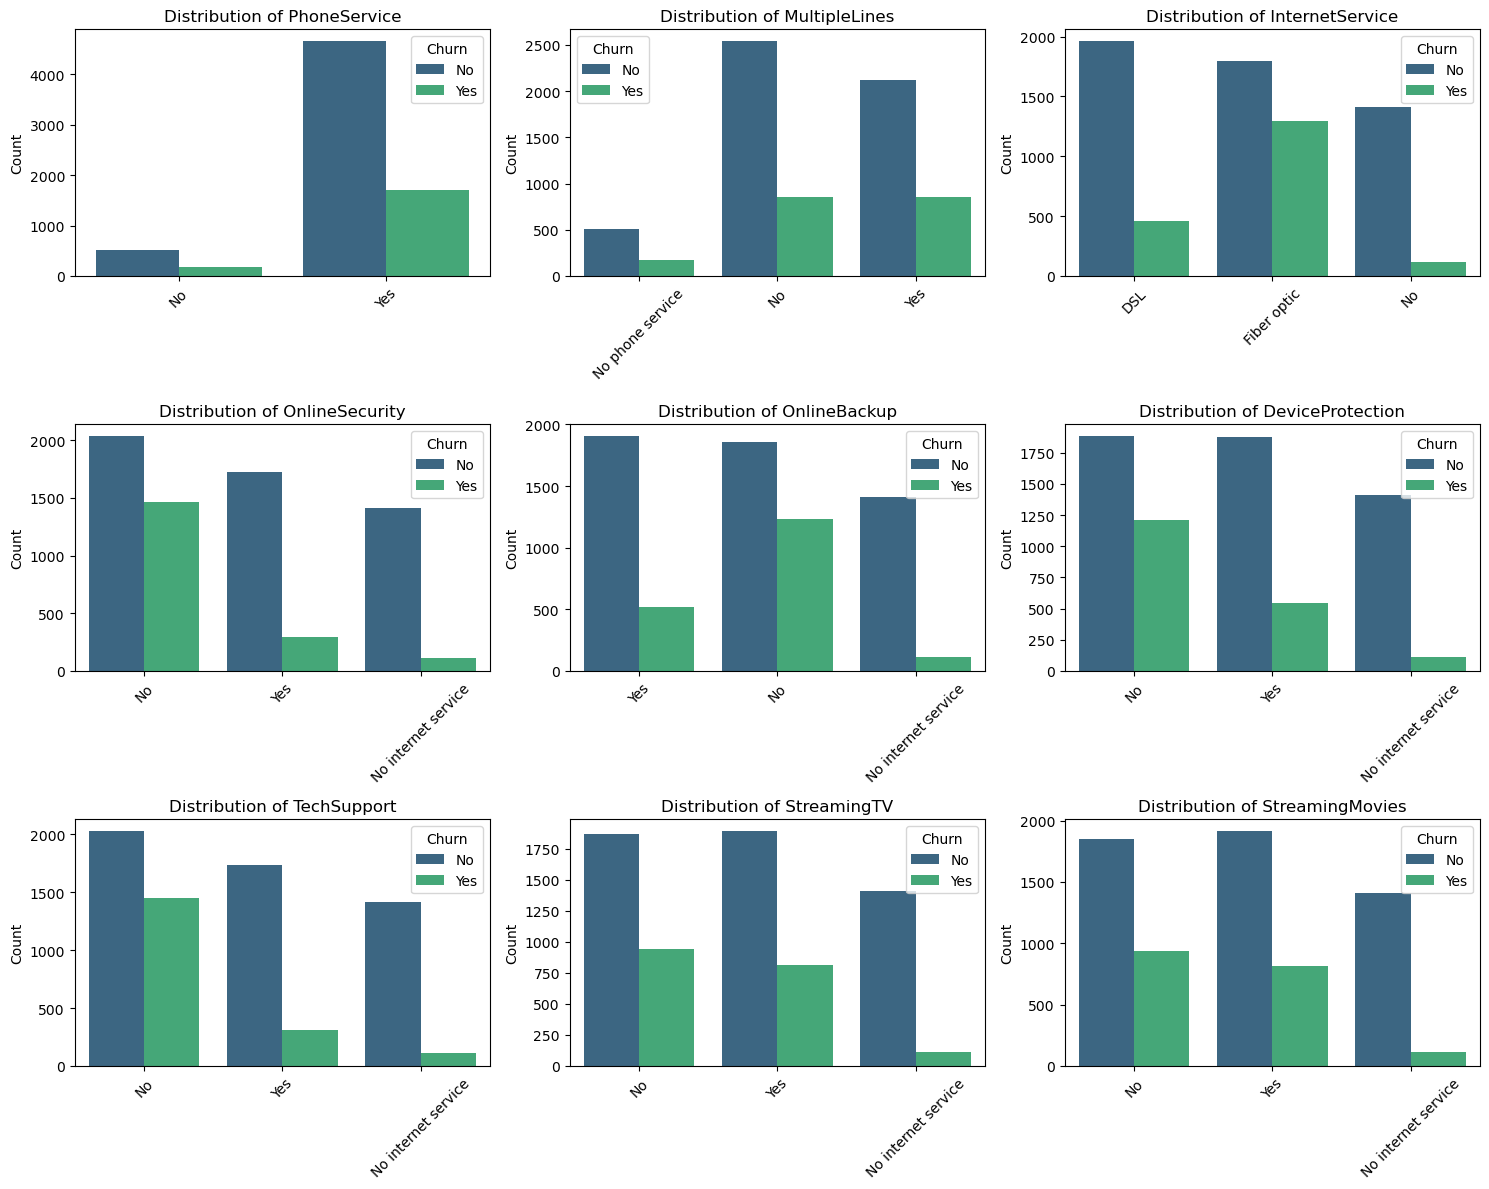

In [34]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid for 9 plots
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create countplots for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', hue = "Churn")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()

The plots indicate clear trends, such as customers with no security services or fiber optic internet having higher churn rates. Each subplot provides insights into how different service categories impact churn behavior.

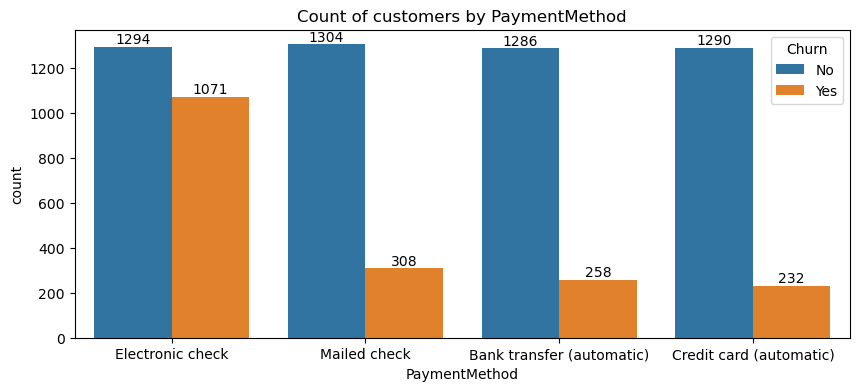

In [36]:
plt.figure(figsize = (10,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of customers by PaymentMethod')
plt.show()

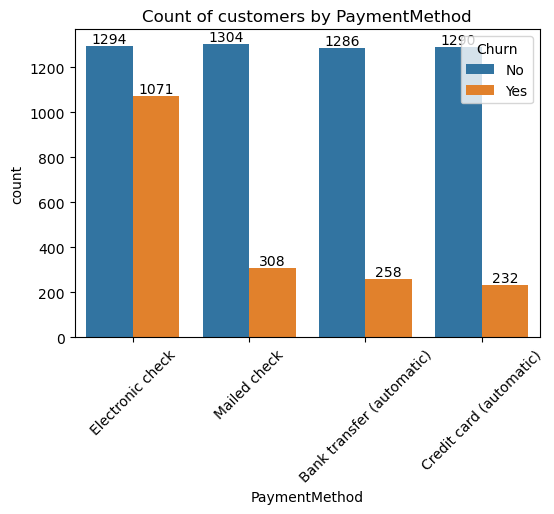

In [37]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of customers by PaymentMethod')
plt.xticks(rotation = 45)
plt.show()

customer is likely to churn when he is using electronic check as payment method.

<b>Conclusion

The analysis of telecom customer churn has revealed significant factors contributing to customer attrition. Key findings indicate that long-term customers with higher service usage and bundled subscriptions tend to have lower churn rates, while customers experiencing frequent technical issues and high charges are more likely to leave. By addressing these pain points through personalized offers, improved service reliability, and competitive pricing strategies, telecom companies can enhance customer retention and reduce churn rates. The insights gained from this study serve as a valuable foundation for optimizing customer engagement strategies.